# Install the required packages

In [1]:
!pip install matplotlib

In [2]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=96c62d6f72c8ec6199ee0522370c5e9a3cfa1e4775214763da17228565c16b02
  Stored in directory: c:\users\zeus\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [20]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.cluster import KMeans
# Common imports
import numpy as np
import os
import random

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Clustering_Network"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=1200)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

ENTER THE DIMENSION OF THE FIELD AS (Length Breadth [as Int]) : 
1000 1000
ENTER THE NUMBER OF NODES THAT IS NEEDED TO BE DEPLOYED [as INT] :
678
ENTER TYPE OF CLUSTER CREATION:
             1. AREA WISE CLUSTER CREATION
             2. DEFAULT (NOT KNOWS AS OF NOW) :
1
ENTER THE NUMBER OF CLUSTERS YOU WANT TO CREATE :
16
[[210.05, 920.83], [911.33, 143.54], [623.55, 822.16], [119.24, 551.54], [867.89, 548.1], [767.26, 384.74], [169.11, 991.81], [861.05, 293.09], [283.18, 421.05], [487.79, 589.51], [846.76, 548.98], [218.62, 478.65], [525.78, 705.66], [298.97, 486.01], [159.56, 368.59], [616.17, 682.17], [460.64, 112.35], [492.89, 483.28], [603.35, 7.77], [819.73, 439.77], [622.37, 964.29], [699.07, 518.38], [346.04, 390.7], [163.7, 246.95], [189.13, 381.38], [352.71, 980.49], [290.81, 170.58], [172.39, 712.84], [231.66, 855.11], [542.89, 169.55], [800.3, 304.4], [647.13, 308.99], [405.57, 413.32], [329.4, 997.8], [443.52, 657.41], [46.29, 749.6], [701.42, 408.16], [409.83, 29.41], [88

Saving figure voronoi_plot


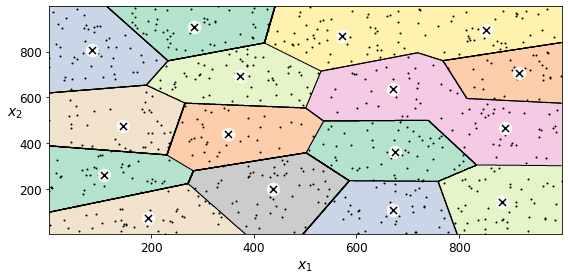

In [29]:
def user_input():
    print("ENTER THE DIMENSION OF THE FIELD AS (Length Breadth [as Int]) : ")
    length,breadth=list(map(int,input().split(" ")))
    print("ENTER THE NUMBER OF NODES THAT IS NEEDED TO BE DEPLOYED [as INT] :")
    nodes=int(input())
    print("""ENTER TYPE OF CLUSTER CREATION:
             1. AREA WISE CLUSTER CREATION
             2. DEFAULT (NOT KNOWS AS OF NOW) :""")
    cluster_option=int(input())
    print("ENTER THE NUMBER OF CLUSTERS YOU WANT TO CREATE :")
    number_of_clusters=int(input())
    
    random_deployment(length,breadth,nodes,number_of_clusters) 

user_input()


In [25]:
def random_deployment(length,breadth,nodes,number_of_clusters):
    no_of_particles = nodes
    particles = []

    




    time = 0

    for i in range(no_of_particles):
        x_cordinate = round(random.randrange(0,length),2)+round(random.random(),2)# creates the x cordinate of the particle in the range 0-100 units
        y_cordinate = round(random.randrange(0,breadth),2)+round(random.random(),2)  # creates the y cordinate of the particles in the range 0-100 units
        particles.append([x_cordinate,y_cordinate])


    print(particles)
    
    K_means_clustering(length,breadth,nodes,number_of_clusters,particles)
    



In [28]:
def K_means_clustering(length,breadth,nodes,number_of_clusters,particles):
    
    
    X=np.array(particles)
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
    y_pred = kmeans.fit_predict(particles)
    
    
    def plot_data(X):
        plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
        if weights is not None:
            centroids = centroids[weights > weights.max() / 10]
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='o', s=30, linewidths=8,
                    color=circle_color, zorder=10, alpha=0.9)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=50, linewidths=50,
                    color=cross_color, zorder=11, alpha=1)

    def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                                 show_xlabels=True, show_ylabels=True):
        mins = X.min(axis=0) - 0.1
        maxs = X.max(axis=0) + 0.1
        #         mins=[0,1000]
        #         maxs=[0,1000]
        xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                             np.linspace(mins[1], maxs[1], resolution))
        Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    cmap="Pastel2")
        plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    linewidths=1, colors='k')
        plot_data(X)
        if show_centroids:
            plot_centroids(clusterer.cluster_centers_)

        if show_xlabels:
            plt.xlabel("$x_1$", fontsize=14)
        else:
            plt.tick_params(labelbottom=False)
        if show_ylabels:
            plt.ylabel("$x_2$", fontsize=14, rotation=0)
        else:
            plt.tick_params(labelleft=False)
            
            
    plt.figure(figsize=(8, 4))
    plot_decision_boundaries(kmeans, X)
    save_fig("voronoi_plot")
    plt.show()